## Introduction

The carbon dioxide record from Mauna Loa Observatory, known as the “Keeling Curve,” is the world’s longest unbroken record of atmospheric carbon dioxide concentrations. Scientists make atmospheric measurements in remote locations to sample air that is representative of a large volume of Earth’s atmosphere and relatively free from local influences.

#### Import the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#### Read the data set in a Time Series with proper Time frequency or period.

In [6]:
df = pd.read_csv('MaunaLoa.csv',parse_dates=['Year-Month'],index_col='Year-Month')
df

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17
...,...
1980-08-01,337.19
1980-09-01,335.49
1980-10-01,336.63


# Plot the Time Series Data.

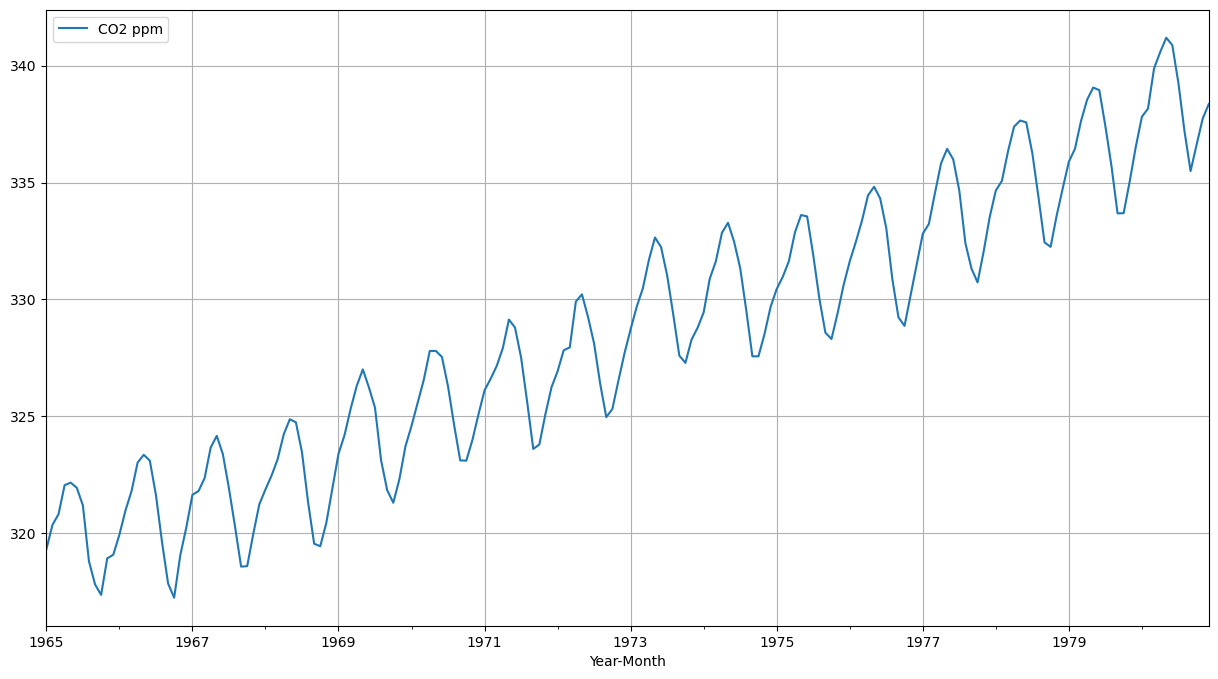

In [7]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()

# Boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years.

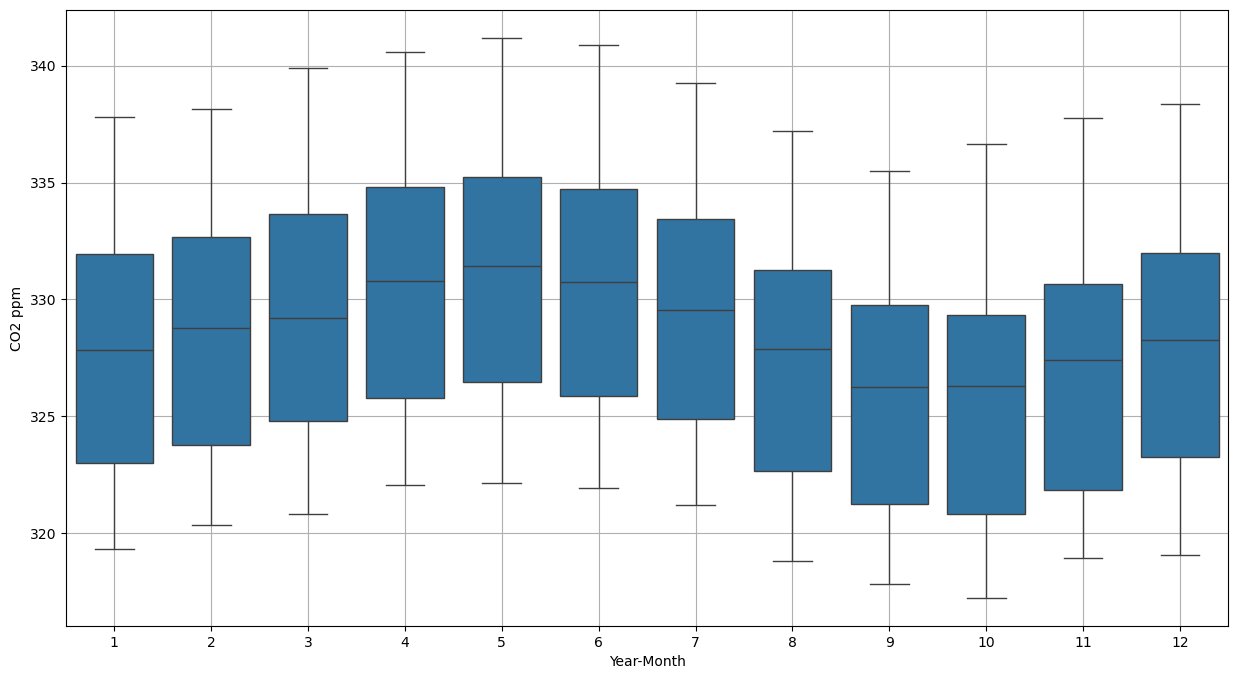

In [8]:
sns.boxplot(x=df.index.month,y=df['CO2 ppm'])
plt.grid();

# Boxplot to understand the variation of Carbon Dioxide in parts per million across years.

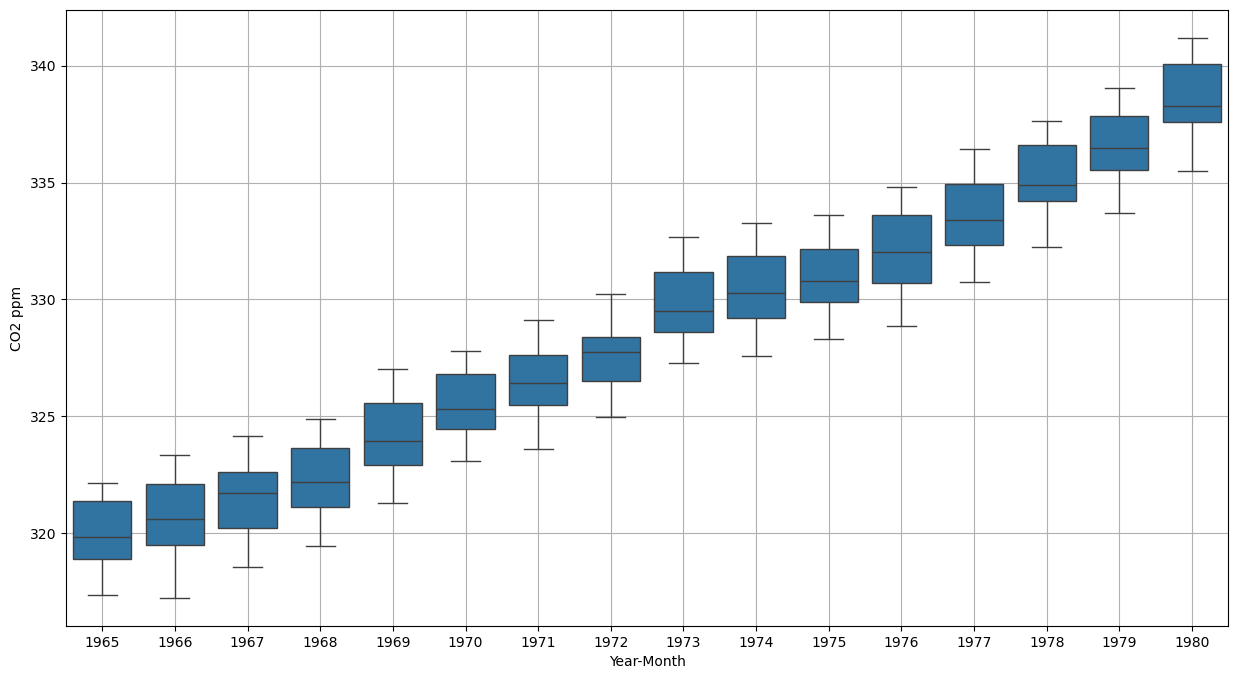

In [9]:
sns.boxplot(x=df.index.year,y=df['CO2 ppm'])
plt.grid();

# Graph of monthly Carbon Dioxide in parts per million across years.

In [10]:
monthly_co2ppm_across_years = pd.pivot_table(df, values = 'CO2 ppm', columns = df.index.month_name(), index = df.index.year)
monthly_co2ppm_across_years

Year-Month,April,August,December,February,January,July,June,March,May,November,October,September
Year-Month,,,,,,,,,,,,
1965,322.06,318.81,319.09,320.36,319.32,321.20,321.95,320.82,322.17,318.93,317.37,317.82
1966,323.03,319.64,320.26,320.98,319.94,321.65,323.11,321.81,323.36,319.06,317.25,317.86
1967,323.67,320.29,321.25,321.81,321.65,321.93,323.39,322.36,324.17,319.98,318.60,318.58
1968,324.23,321.34,321.92,322.47,321.88,323.47,324.75,323.17,324.88,320.45,319.45,319.56
1969,326.31,323.12,323.72,324.21,323.40,325.37,326.24,325.33,327.01,322.31,321.31,321.85
1970,327.80,324.63,325.09,325.57,324.60,326.28,327.54,326.55,327.80,323.99,323.11,323.12
1971,327.92,325.62,326.25,326.61,326.12,327.52,328.80,327.16,329.14,325.10,323.80,323.61
1972,329.91,326.39,327.71,327.83,326.93,328.11,329.25,327.95,330.22,326.54,325.32,324.97
1973,331.69,329.36,328.79,329.69,328.73,331.03,332.24,330.47,332.65,328.28,327.29,327.60


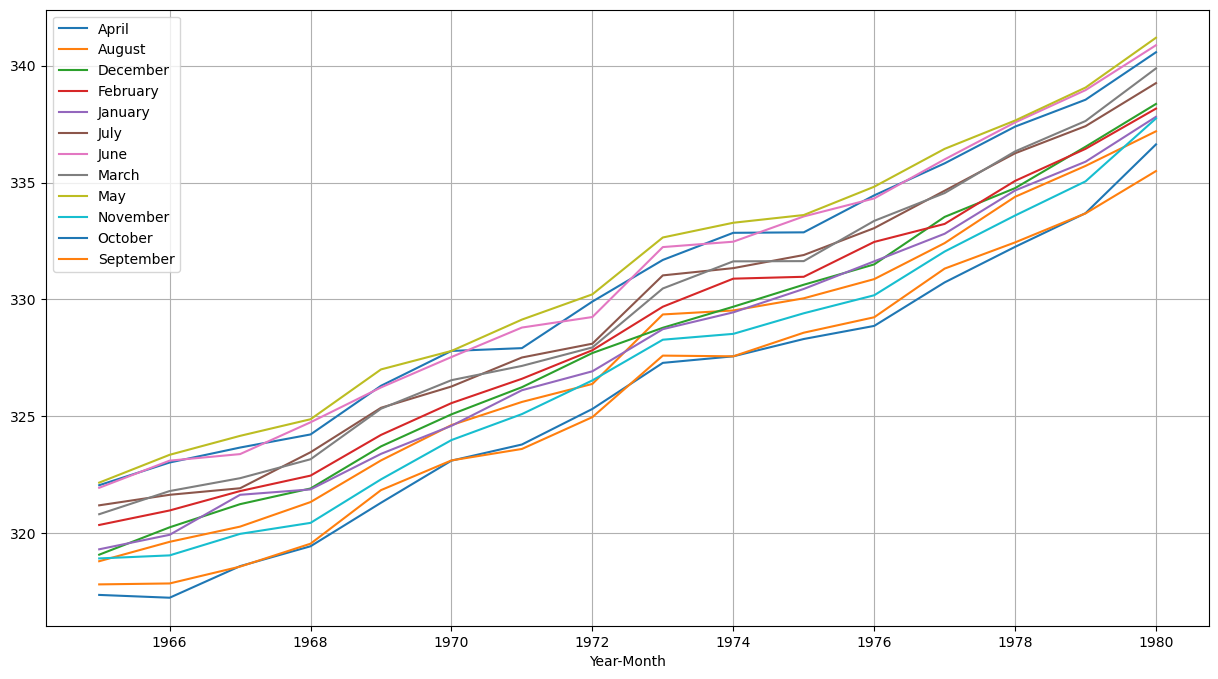

In [11]:
monthly_co2ppm_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Decompose the Time Series to understand the various components.

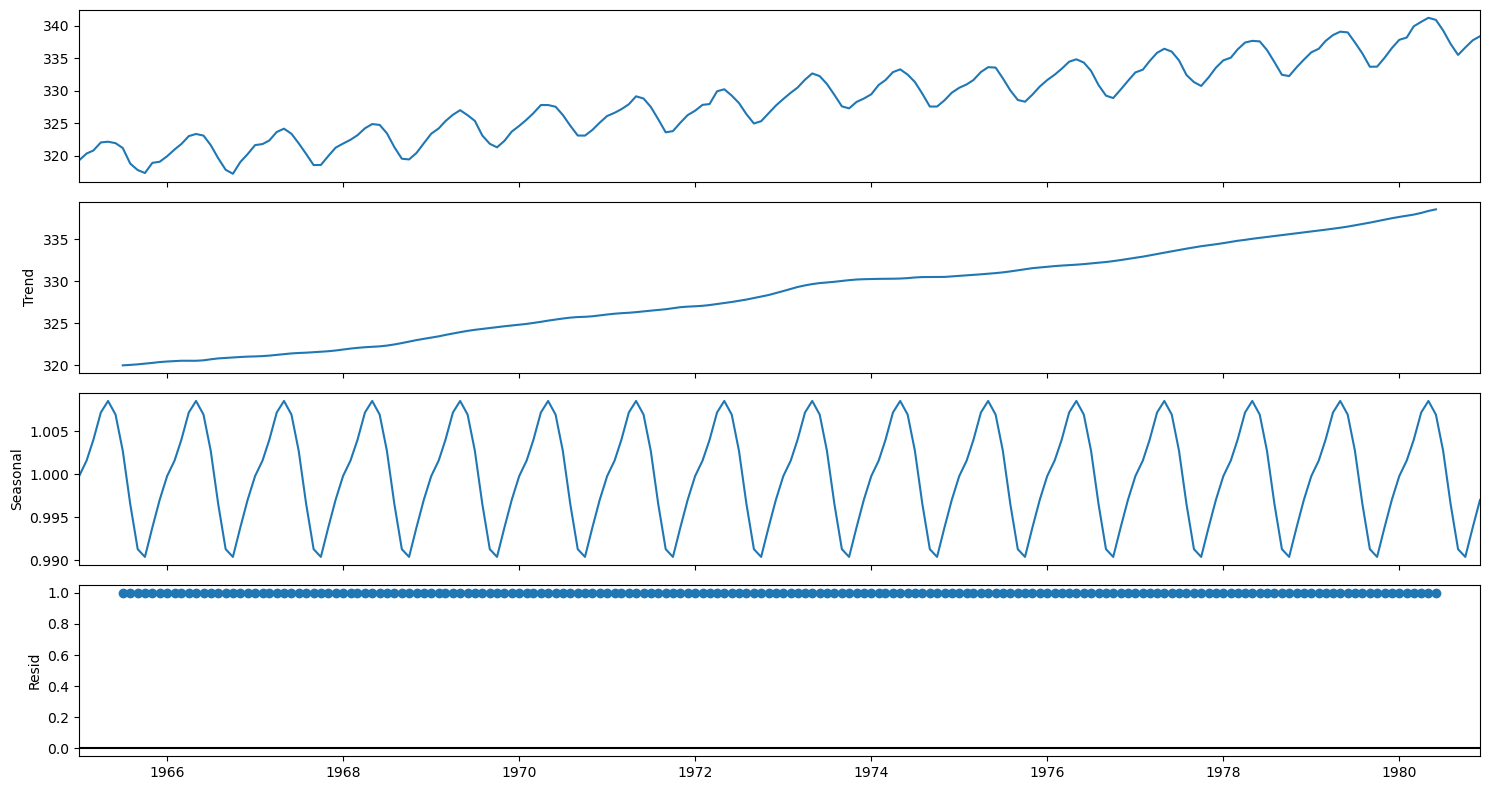

In [12]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

# Graph of the average and percentage change of Carbon Dioxide in parts per million across years.

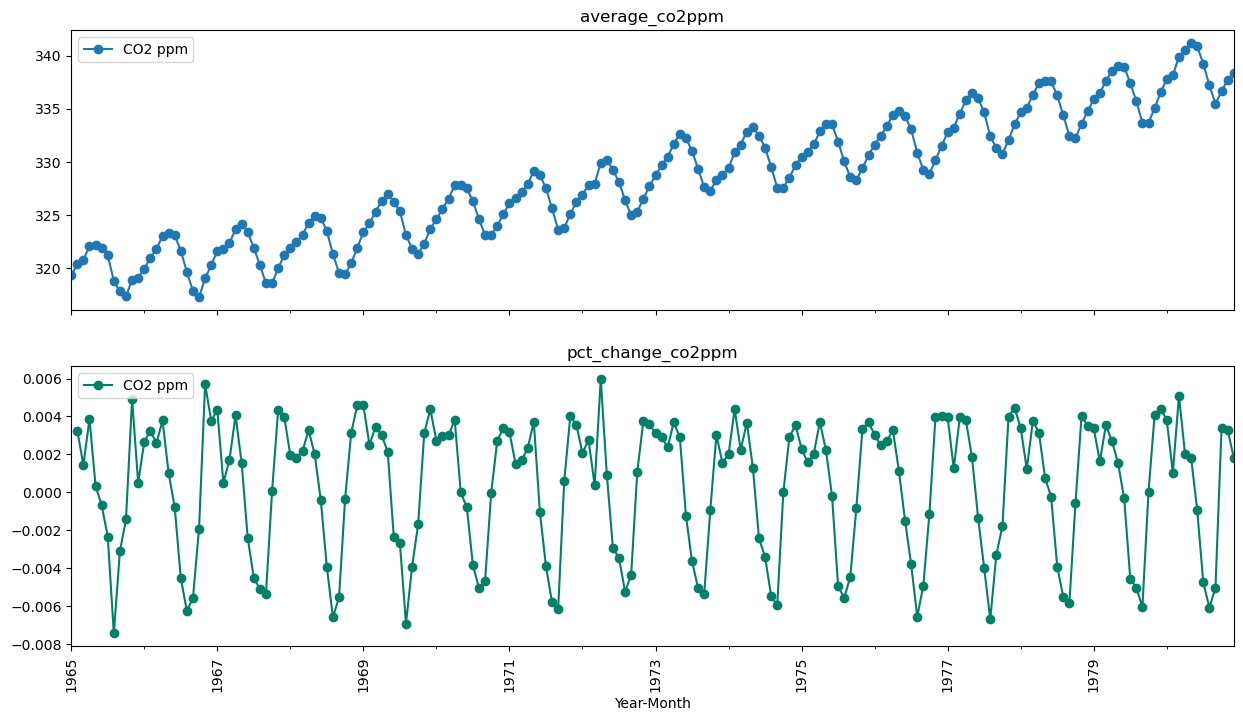

In [13]:
average_co2ppm    = df.groupby(df.index)["CO2 ppm"].mean()
pct_change_co2ppm = df.groupby(df.index)["CO2 ppm"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average CO2-ppm over time(year-month)
ax1 = average_co2ppm.plot(legend=True,ax=axis1,marker='o',title="average_co2ppm")

ax1.set_xticks(range(len(average_co2ppm)))
ax1.set_xticklabels(average_co2ppm.index.tolist(), rotation=90)

# plot precent change for CO2-ppm over time(year-month)
ax2 = pct_change_co2ppm.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_co2ppm")

# Split the data into train and test

In [14]:
train = df[0:int(len(df)*0.75)] 
test = df[int(len(df)*0.75):]

# Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05. 

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

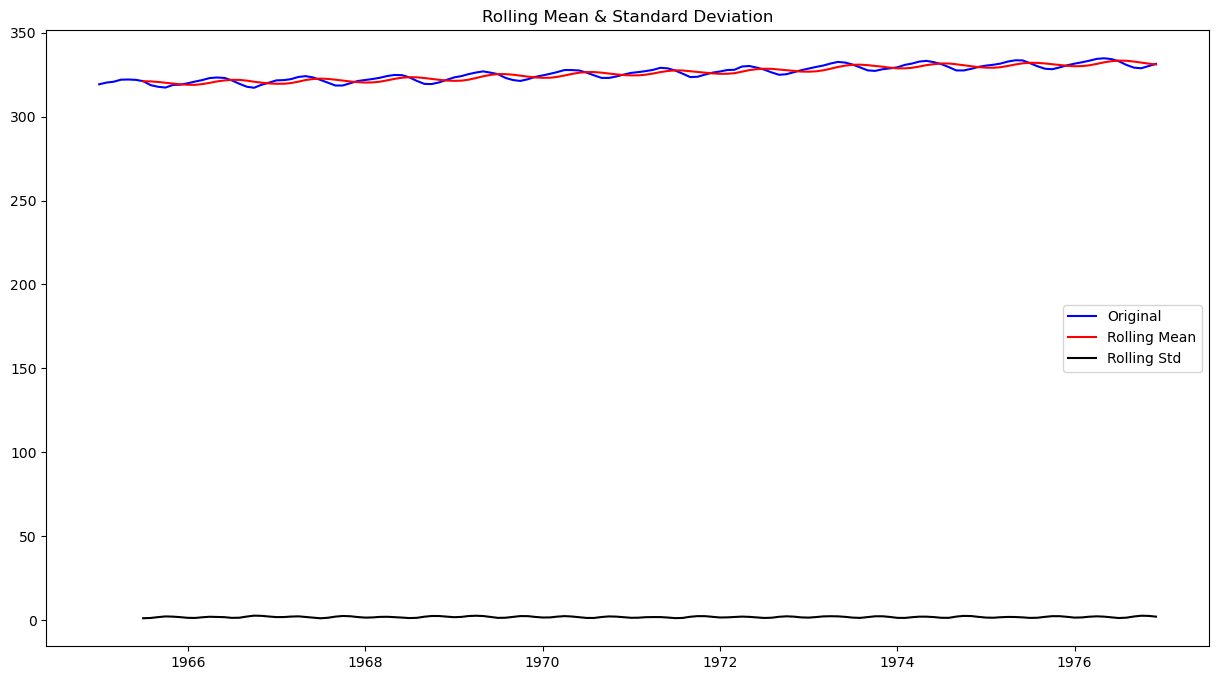

Results of Dickey-Fuller Test:
Test Statistic                  -0.257683
p-value                          0.931288
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 



In [16]:
test_stationarity(train['CO2 ppm'])

## The data is non-stationary, we use difference of data to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at $\alpha$ = 0.05.

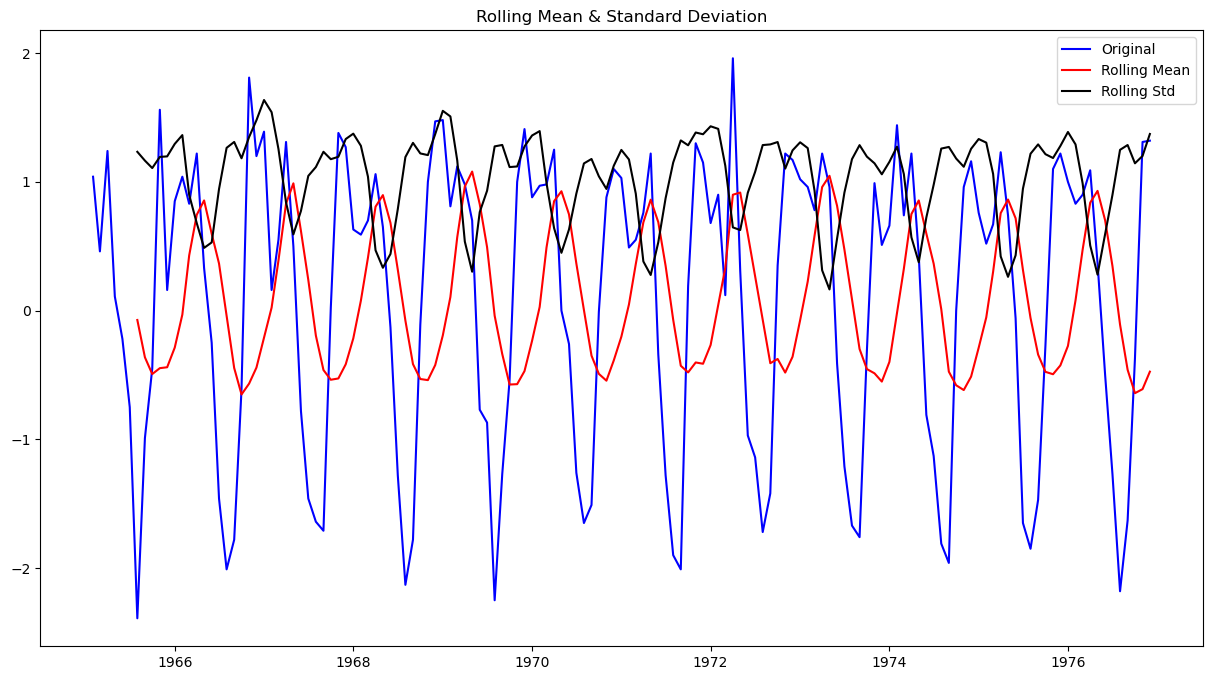

Results of Dickey-Fuller Test:
Test Statistic                  -3.386995
p-value                          0.011410
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 



In [17]:
test_stationarity(train.diff().dropna())

# Check the ACF and PACF of the training data.

In [18]:
train_diff = train.diff(periods=1).dropna()
train_diff

,CO2 ppm
Year-Month,
1965-02-01,1.04
1965-03-01,0.46
1965-04-01,1.24
1965-05-01,0.11
1965-06-01,-0.22
...,...
1976-08-01,-2.18
1976-09-01,-1.63
1976-10-01,-0.37


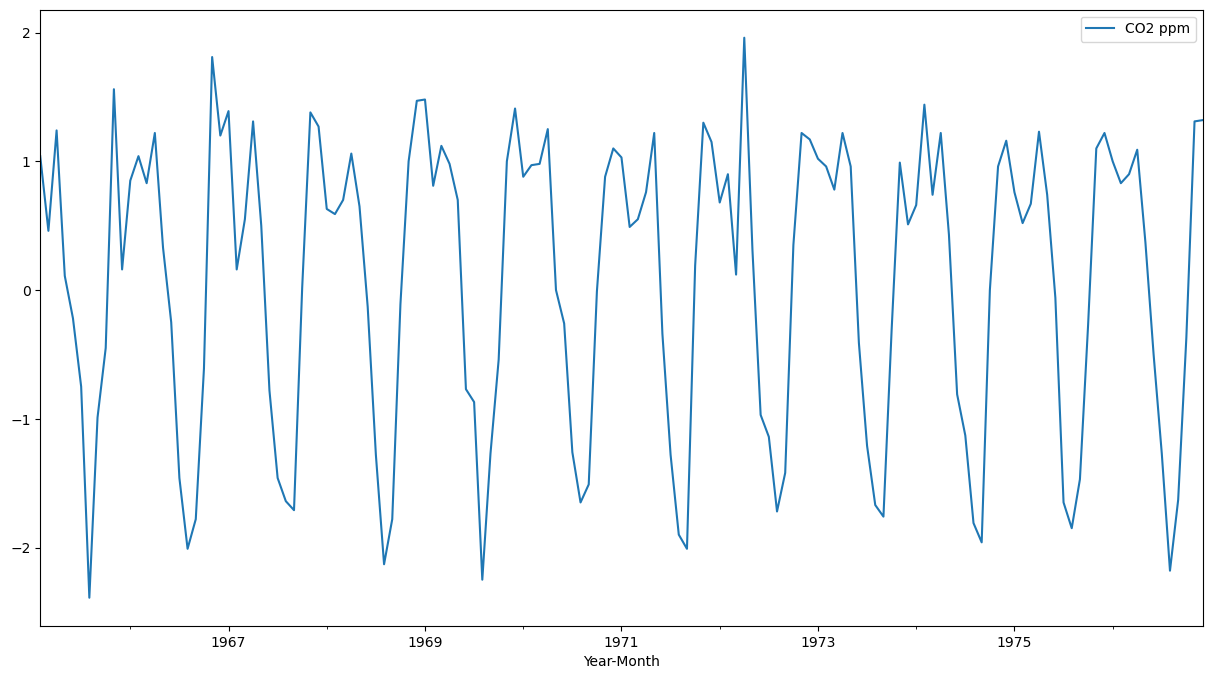

In [19]:
train_diff.plot();

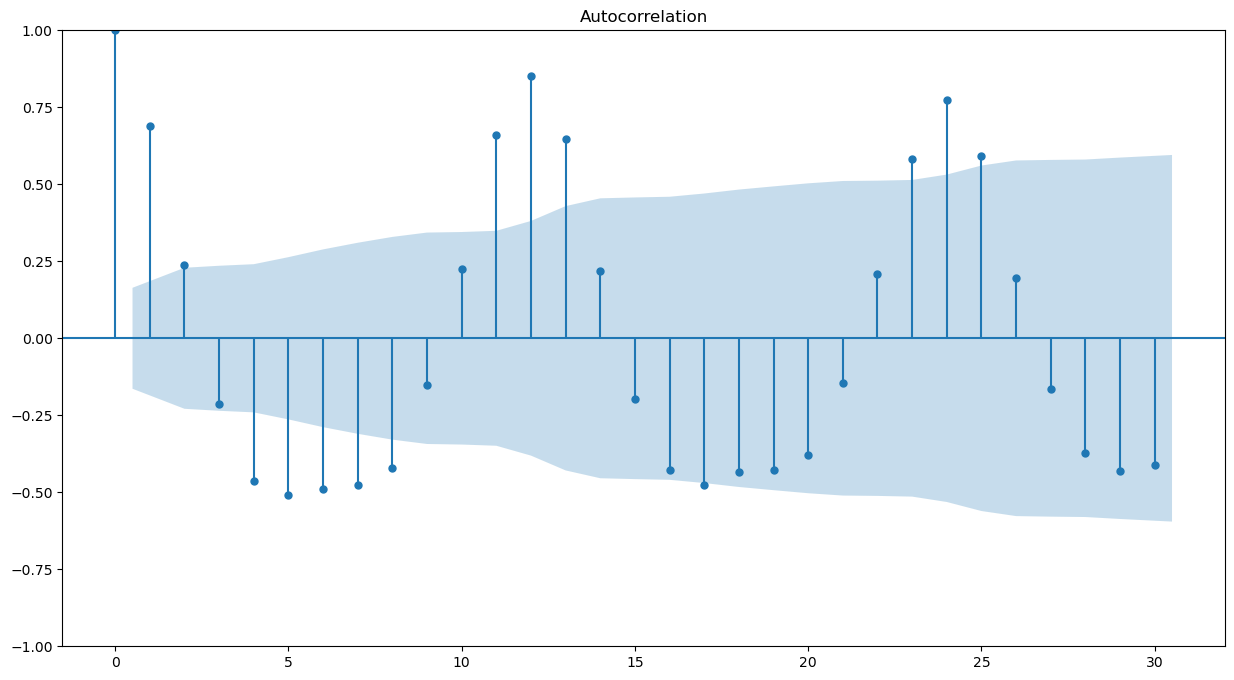

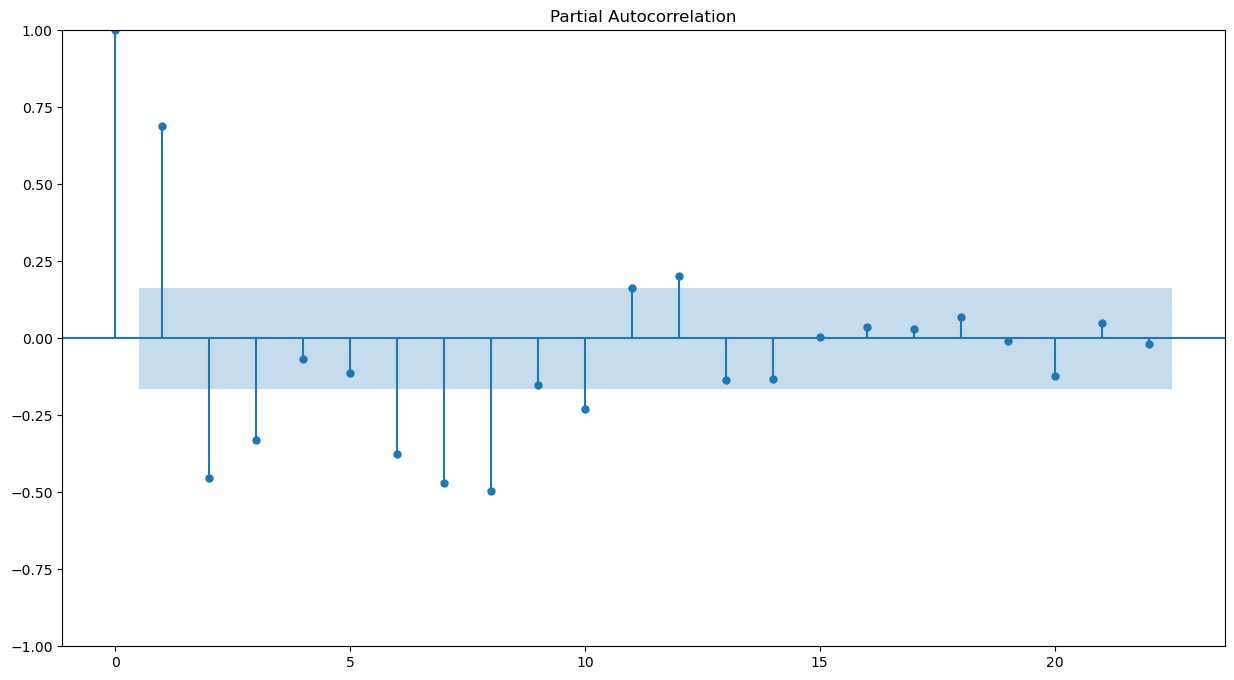

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

# ARIMA Model

In [21]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we have already taken a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [23]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
params = []
aic = []

for param in pdq:
    ARIMA_model = ARIMA(train['CO2 ppm'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    params.append(param)
    aic.append(ARIMA_model.aic)

ARIMA_AIC['param'] = params
ARIMA_AIC['AIC'] = aic
ARIMA_AIC

ARIMA(0, 1, 0) - AIC:444.71223526814674
ARIMA(0, 1, 1) - AIC:363.92339612690546
ARIMA(0, 1, 2) - AIC:333.39295242317
ARIMA(1, 1, 0) - AIC:352.77249617837214
ARIMA(1, 1, 1) - AIC:338.1074239295622
ARIMA(1, 1, 2) - AIC:327.25243019798467
ARIMA(2, 1, 0) - AIC:320.9728196752325
ARIMA(2, 1, 1) - AIC:285.00082931039526
ARIMA(2, 1, 2) - AIC:286.5200130082291


,param,AIC
0,"(0, 1, 0)",444.712235
1,"(0, 1, 1)",363.923396
2,"(0, 1, 2)",333.392952
3,"(1, 1, 0)",352.772496
4,"(1, 1, 1)",338.107424
5,"(1, 1, 2)",327.252430
6,"(2, 1, 0)",320.972820
7,"(2, 1, 1)",285.000829
8,"(2, 1, 2)",286.520013


In [24]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
7,"(2, 1, 1)",285.000829
8,"(2, 1, 2)",286.520013
6,"(2, 1, 0)",320.972820
5,"(1, 1, 2)",327.252430
2,"(0, 1, 2)",333.392952
4,"(1, 1, 1)",338.107424
3,"(1, 1, 0)",352.772496
1,"(0, 1, 1)",363.923396
0,"(0, 1, 0)",444.712235


In [25]:
mod = ARIMA(train['CO2 ppm'], order=(2,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -138.500
Date:                Sat, 06 Jul 2024   AIC                            285.001
Time:                        11:14:28   BIC                            296.852
Sample:                    01-01-1965   HQIC                           289.817
                         - 12-01-1976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5291      0.054     28.213      0.000       1.423       1.635
ar.L2         -0.8274      0.054    -15.320      0.000      -0.933      -0.722
ma.L1         -0.8291      0.066    -12.484      0.0

# Prediction on the Test Set using this model and evaluating the model on the test set using RMSE and MAPE

In [29]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1977-01-01    332.717760
1977-02-01    333.487603
1977-03-01    333.657145
1977-04-01    333.279400
1977-05-01    332.561515
1977-06-01    331.776372
1977-07-01    331.169826
1977-08-01    330.892019
1977-09-01    330.969104
1977-10-01    331.316837
1977-11-01    331.784765
1977-12-01    332.212538
1978-01-01    332.479460
1978-02-01    332.533652
1978-03-01    332.395658
1978-04-01    332.139816
1978-05-01    331.862793
1978-06-01    331.650895
1978-07-01    331.556103
1978-08-01    331.586488
1978-09-01    331.711384
1978-10-01    331.877217
1978-11-01    332.027446
1978-12-01    332.119942
1979-01-01    332.137074
1979-02-01    332.086734
1979-03-01    331.995587
1979-04-01    331.897868
1979-05-01    331.823866
1979-06-01    331.791566
1979-07-01    331.803409
1979-08-01    331.848244
1979-09-01    331.906999
1979-10-01    331.959744
1979-11-01    331.991779
1979-12-01    331.997120
1980-01-01    331.978781
1980-02-01    331.946319
1980-03-01    331.911857
1980-04-01    331.886022


In [30]:
RMSE_autoARIMA = mean_squared_error(test['CO2 ppm'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['CO2 ppm'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 4.753883538738594 
MAPE for the autofit ARIMA model: 1.2


In [31]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753884,1.2


# Forecasting the values for the next 24 months using the ARIMA model

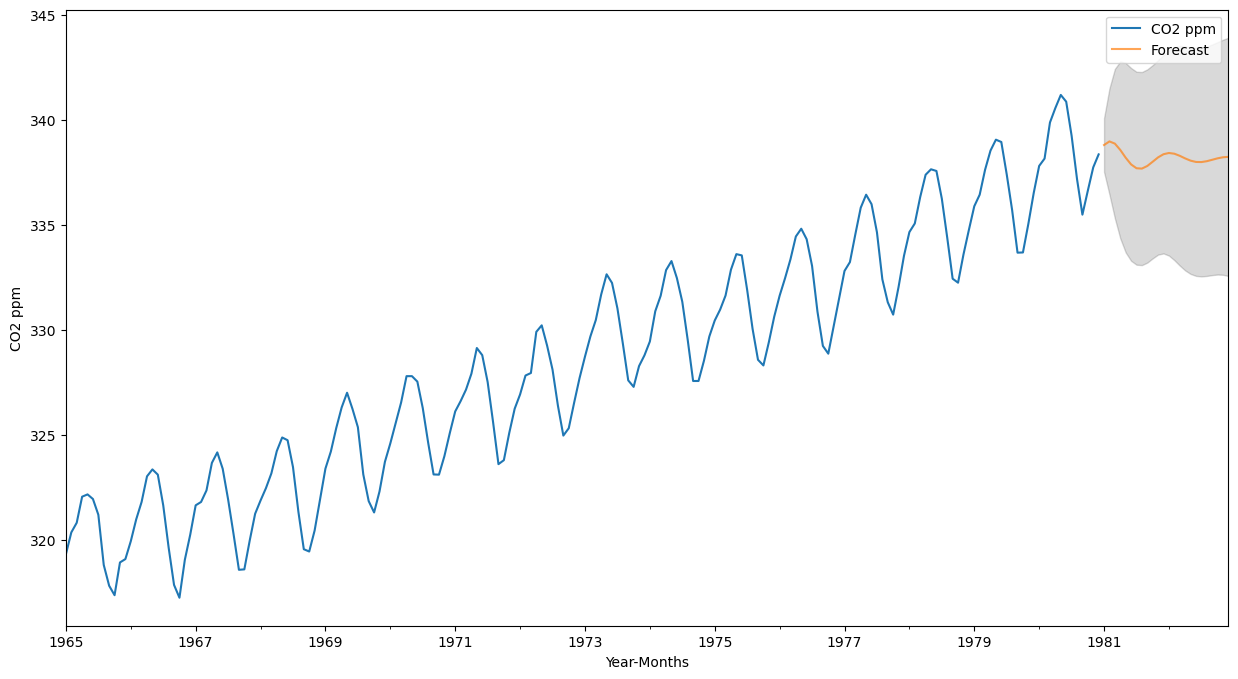

In [35]:
pred_dynamic = results_Arima_full_model.get_prediction(start=pd.to_datetime('1981-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred95 = results_Arima_full_model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

forecast_fullmodel_autoarima = pred95.predicted_mean

# plot the forecast along with the confidence band
axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autoarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autoarima.index, pred_ci_95['lower CO2 ppm'], pred_ci_95['upper CO2 ppm'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# SARIMA model
[Here we have taken the range of values of p,q,P and Q to be between 0 and 2]

In [36]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [46]:
SARIMA_AIC = pd.DataFrame(columns=['params','seasonal', 'AIC'])
paramli = []
seas = []
aic = []

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)

        paramli.append(param)
        seas.append(param_seasonal)
        aic.append(results_SARIMA.aic)
        
SARIMA_AIC['params'] = paramli
SARIMA_AIC['seasonal'] = seas
SARIMA_AIC['AIC'] = aic
SARIMA_AIC

,params,seasonal,AIC
0,"(0, 1, 0)","(0, 0, 0, 12)",441.780622
1,"(0, 1, 0)","(0, 0, 1, 12)",322.996875
2,"(0, 1, 0)","(0, 0, 2, 12)",232.008494
3,"(0, 1, 0)","(1, 0, 0, 12)",151.728632
4,"(0, 1, 0)","(1, 0, 1, 12)",90.950702
...,...,...,...
76,"(2, 1, 2)","(1, 0, 1, 12)",87.808830
77,"(2, 1, 2)","(1, 0, 2, 12)",69.483136
78,"(2, 1, 2)","(2, 0, 0, 12)",91.132692
79,"(2, 1, 2)","(2, 0, 1, 12)",68.393855


In [47]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,params,seasonal,AIC
32,"(1, 1, 0)","(1, 0, 2, 12)",62.004003
5,"(0, 1, 0)","(1, 0, 2, 12)",62.413951
8,"(0, 1, 0)","(2, 0, 2, 12)",62.910580
34,"(1, 1, 0)","(2, 0, 1, 12)",63.434247
16,"(0, 1, 1)","(2, 0, 1, 12)",63.535257


In [48]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['CO2 ppm'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 -26.002
Date:                                 Sat, 06 Jul 2024   AIC                             62.004
Time:                                         17:03:46   BIC                             75.857
Sample:                                     01-01-1965   HQIC                            67.629
                                          - 12-01-1976                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1409      0.096     -1.466      0.143      -0.329       0

# Prediction on the Test Set using this model and evaluating the model on the test set using RMSE and MAPE

In [49]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
RMSE_autoSARIMA = mean_squared_error(test['CO2 ppm'],predicted_autoSARIMA,squared=False)
MAPE_autoSARIMA = MAPE(test['CO2 ppm'],predicted_autoSARIMA)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 1.5276228566377257 
MAPE for the autofit SARIMA model: 0.41


In [50]:
temp_resultsDf = pd.DataFrame({'RMSE': [RMSE_autoSARIMA],'MAPE':[MAPE_autoSARIMA]}
                           ,index=['SARIMA(1, 1, 0)(1,0,2)12'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753884,1.20
"SARIMA(1, 1, 0)(1,0,2)12",1.527623,0.41


# Forecast the values for the next 24 months using the SARIMA model

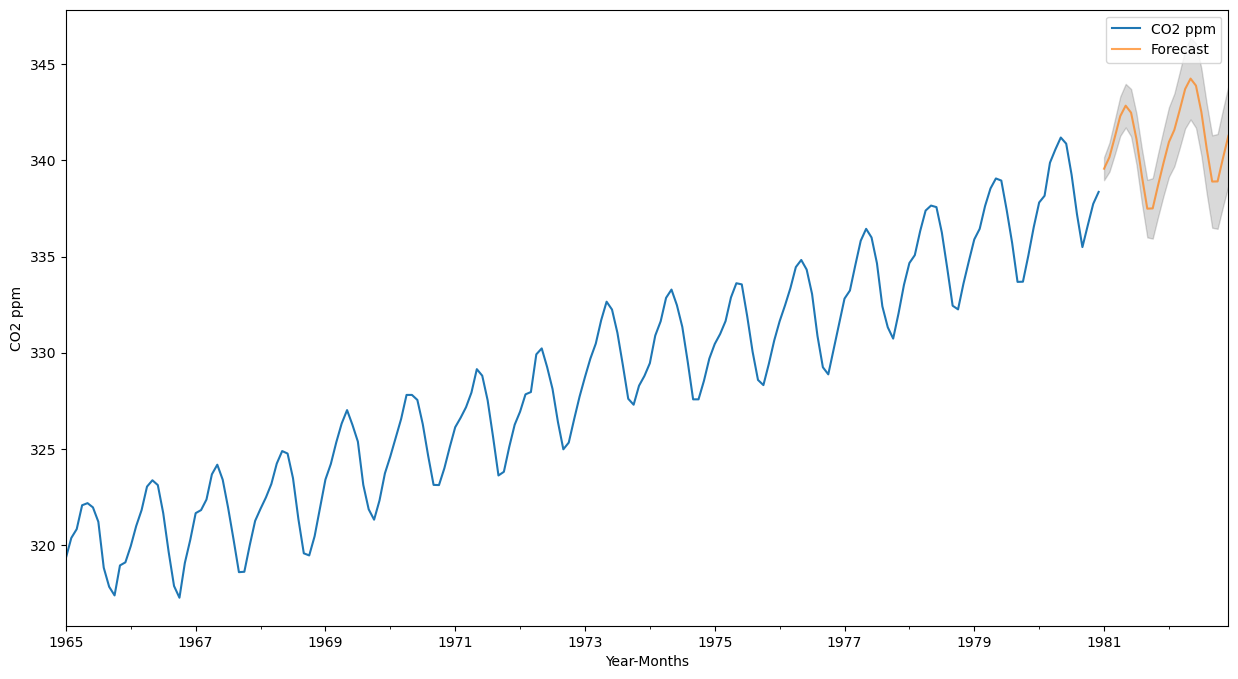

In [63]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1981-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred95 = results_SARIMA_fullmodel.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()
forecast_fullmodel_autosarima = pred95.predicted_mean

# plot the forecast along with the confidence band
axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower CO2 ppm'], pred_ci_95['upper CO2 ppm'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# END